<a href="https://colab.research.google.com/github/ucfilho/Raianars_July_2020/blob/master/DE_ANN_properties_jul_11_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/ucfilho/Raianars_July_2020 #clonar do Github
%cd Raianars_July_2020

fatal: destination path 'Raianars_July_2020' already exists and is not an empty directory.
/content/Raianars_July_2020


In [3]:
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX


############################### DADOS DE ENTRADA 
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=50 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=10 # NUMBER OF PARTICLES

Frac=1

mut=0.5
crossp=0.5
RUNS=5
Dimension=[5,10,15,20,30]



SOMA=0

In [4]:
def Diversity(X):
  soma=0
  nrow,ncol=X.shape
  for j in range(ncol):
    Xj=np.mean(X[:,j])
    for i in range(nrow):
        soma=soma+(X[i,j]-Xj)**2
  DI=(soma/nrow)**0.5
  return DI

def RV(Fobj_zero,FOBEST,RV0):
  if(abs(Fobj_zero) > 2*abs(FOBEST)):
    RVF=2
  elif(abs(Fobj_zero) == abs(FOBEST)):
    RVF=0
  else:
    RVF=1
  deltaRV=RVF-RV0
  return RVF,deltaRV

In [5]:
start_time = time.time()
BEST_AGENTS=[]
MAT_Div=[]
MAT_RV=[]
MAT_Delta=[]
RUNS=3
dim=5

for i in range(RUNS):

    #fchoice='Fake_Rosenbrock'  
    #Fun=Function.Fake_Rosenbrock
    if(i==0):
      fchoice='Ackley'
      Fun=Function.Ackley
    elif(i==1):
      fchoice='Michalewicz'
      Fun=Function.Michalewicz
    else:
      fchoice='Sphere'  
      Fun=Function.Sphere 

    
    TOTAL=10*dim*its*ITE

    Div_dim=[]
    RV_dim=[]
    Delta_dim=[]

    MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)

    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(dim)
    for ii in range(dim):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Div_initial=Diversity(X)
    #print('=====',X[1,1],'======')
    

    BEST_AGENTS=[]
    RV0=0
    SOMA=0

    Xw,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
    Fobj_zero=np.copy(FOBEST)
    print('dimension=',dim)
    print('========',len(MAX),'========')

    xite=[]
    for i in range(ITE):
      if((i+1)% Frac==0):
        xite.append(i+1)


    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      RVF,deltaRV=RV(Fobj_zero,FOBEST,RV0)
      if((k+1)% Frac ==0):
        #print(X[1,1])
        Div_time=Diversity(X)
        DI=Div_time/Div_initial
        Div_dim.append(DI)
        RV_dim.append(RVF)
        Delta_dim.append(deltaRV)
      RV0=np.copy(RVF)

    BEST_AGENTS.append(BEST_XY)    
    MAT_Div.append(Div_dim)
    MAT_RV.append(RV_dim)
    MAT_Delta.append(Delta_dim)
    start_run = (time.time()-start_time)/60
    Foj_zero=np.copy(FOBEST)
    
    print('run=',i,'total=50','Fobj=',FOBEST,'Time=',start_run)  
    

    ############################## Cálculo dos Parâmetros de Avaliação   
    TIME = (time.time() - start_time)/RUNS
    BEST_AGENTS=np.array(BEST_AGENTS)
    BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
    BEST=BEST_AGENTS_ST[0]
    WORSE=BEST_AGENTS_ST[-1]
    MEAN=np.mean(BEST_AGENTS,axis=0)
    MAXFO=BEST_AGENTS[:,-1].max()
    MINFO=BEST_AGENTS[:,-1].min()
    STD=BEST_AGENTS[:,-1].std()

    nome='_DE_STAT_Fo-'+str(mut)+'_CRo-'+str(crossp)+'_D-'+str(dim)+'_Interv-'+str(ITE)
    print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', dim,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
    print(nome, '\n')
    #print('BEST: ',BEST)
    #print('MÉDIA: ',MEAN)
    print('MÉDIA: ',MEAN[-1])
    print('MIN __:',MINFO)
    print('MAX__: ',MAXFO)
    print('STD __:',STD)
    print("Tempo Médio= %.3f segundos ---" % (TIME))
    print(RUNS,'Rodadas') 
    print()
    print('BEST: ',BEST)
    # print('melhor=',BEST_AGENTS[BEST_INDEX])
Diversity=pd.DataFrame(MAT_Div)
RV=pd.DataFrame(MAT_RV)
Delta=pd.DataFrame(MAT_Delta)

dimension= 5
======== 5 ========
run= 49 total=50 Fobj= 1.8543908497986057 Time= 0.0011346578598022462
DE_POP_VAR_F_CR TOTAL= 2500 Iterações= 50 Dim= 5 Min/Max= -32 / 32 _ Ackley
_DE_STAT_Fo-0.5_CRo-0.5_D-5_Interv-50 

MÉDIA:  1.8543908497986057
MIN __: 1.8543908497986057
MAX__:  1.8543908497986057
STD __: 0.0
Tempo Médio= 0.023 segundos ---
3 Rodadas

BEST:  [-0.02071154 -0.1100631  -0.03389811  0.06107392  0.96300877  1.85439085]
dimension= 5
======== 5 ========
run= 49 total=50 Fobj= -4.517570008030443 Time= 0.0024209380149841308
DE_POP_VAR_F_CR TOTAL= 2500 Iterações= 50 Dim= 5 Min/Max= 0 / 3.141592653589793 _ Michalewicz
_DE_STAT_Fo-0.5_CRo-0.5_D-5_Interv-50 

MÉDIA:  -4.517570008030443
MIN __: -4.517570008030443
MAX__:  -4.517570008030443
STD __: 0.0
Tempo Médio= 0.049 segundos ---
3 Rodadas

BEST:  [ 2.19633176  1.56487495  2.22105051  1.92739408  1.72183302 -4.51757001]
dimension= 5
======== 5 ========
run= 49 total=50 Fobj= 0.012043553999482337 Time= 0.0033402800559997558
DE_PO

In [6]:
print(RV)

   0   1   2   3   4   5   6   7   8   9   10  ...  39  40  41  42  43  44  45  46  47  48  49
0   1   1   1   1   1   1   1   1   1   1   1  ...   2   2   2   2   2   2   2   2   2   2   2
1   0   0   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   1   1   1   1   1
2   0   0   1   1   1   1   2   2   2   2   2  ...   2   2   2   2   2   2   2   2   2   2   2

[3 rows x 50 columns]


In [7]:
Names=['Ackley', 'Michalewicz','Sphere']

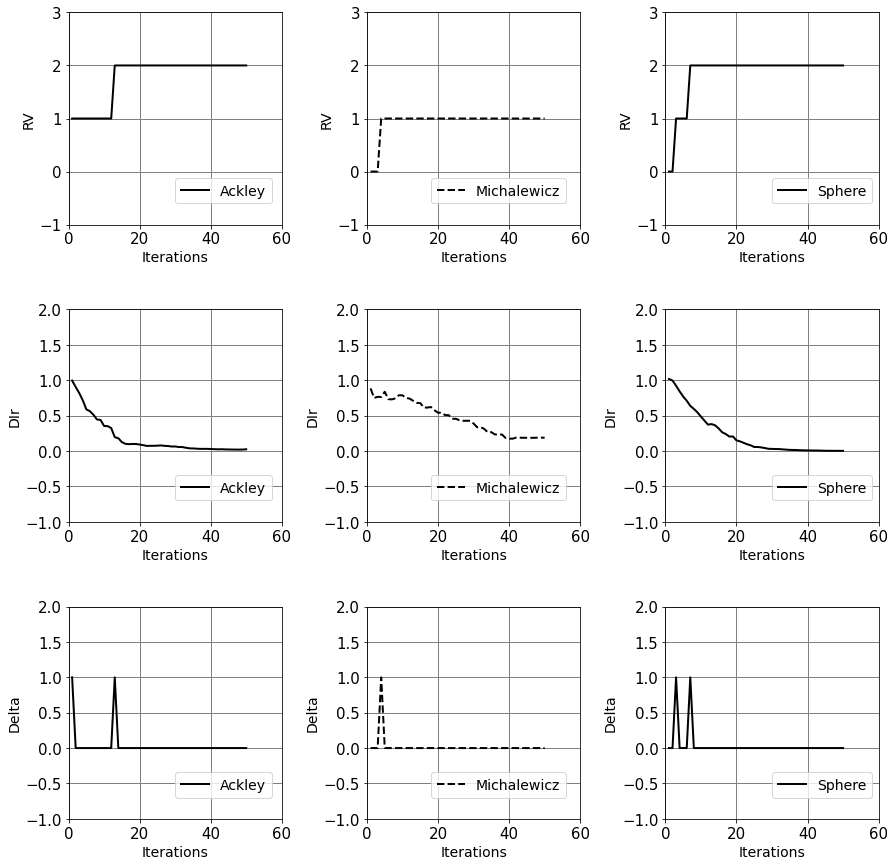

In [8]:
plt.subplot(3,3,1)
plt.plot(xite,RV.iloc[0],'k-',linewidth=2)
plt.xlim(0, 60)
plt.ylim(-1, 3)
plt.ylabel('RV', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.grid(True, linewidth=1,color='gray')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend( (Names[0],), loc=[0.5,0.1], fontsize=14)
plt.subplot(3,3,2)
plt.plot(xite,RV.iloc[1],'k--',linewidth=2)
plt.xlim(0, 60)
plt.ylim(-1, 3)
plt.legend( (Names[1],), loc=[0.3,0.1], fontsize=14)
plt.ylabel('RV', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.grid(True, linewidth=1,color='gray')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplot(3,3,3)
plt.plot(xite,RV.iloc[2],'k-', linewidth=2)
plt.xlim(0, 60)
plt.ylim(-1, 3)
plt.legend( (Names[2],), loc=[0.5,0.1], fontsize=14)
plt.ylabel('RV', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.grid(True, linewidth=1,color='gray')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplot(3,3,4)
plt.plot(xite,Diversity.iloc[0],'k-',linewidth=2)
plt.xlim(0, 60)
plt.ylim(-1, 2)
plt.ylabel('DIr', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.grid(True, linewidth=1,color='gray')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend( (Names[0],), loc=[0.5,0.1], fontsize=14)
plt.subplot(3,3,5)
plt.plot(xite,Diversity.iloc[1],'k--',linewidth=2)
plt.xlim(0, 60)
plt.ylim(-1, 2)
plt.legend( (Names[1],), loc=[0.3,0.1], fontsize=14)
plt.ylabel('DIr', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.grid(True, linewidth=1,color='gray')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplot(3,3,6)
plt.plot(xite,Diversity.iloc[2],'k-', linewidth=2)
plt.xlim(0, 60)
plt.ylim(-1, 2)
plt.legend( (Names[2],), loc=[0.5,0.1], fontsize=14)
plt.ylabel('DIr', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.grid(True, linewidth=1,color='gray')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplot(3,3,7)
plt.plot(xite,Delta.iloc[0],'k-',linewidth=2)
plt.xlim(0, 60)
plt.ylim(-1, 2)
plt.ylabel('Delta', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.grid(True, linewidth=1,color='gray')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend( (Names[0],), loc=[0.5,0.1], fontsize=14)
plt.subplot(3,3,8)
plt.plot(xite,Delta.iloc[1],'k--',linewidth=2)
plt.xlim(0, 60)
plt.ylim(-1, 2)
plt.legend( (Names[1],), loc=[0.3,0.1], fontsize=14)
plt.ylabel('Delta', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.grid(True, linewidth=1,color='gray')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplot(3,3,9)
plt.plot(xite,Delta.iloc[2],'k-', linewidth=2)
plt.xlim(0, 60)
plt.ylim(-1, 2)
plt.legend( (Names[2],), loc=[0.5,0.1], fontsize=14)
plt.ylabel('Delta', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.grid(True, linewidth=1,color='gray')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)


In [9]:
Delta

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
RV

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
